In [1]:
import pandas as pd 
import os 
from skimage.transform import resize 
from skimage.io import imread 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [4]:
Categories=['cats','dogs'] 
flat_data_arr=[]
target_arr=[]
datadir='../Downloads/training_set/training_set/'
for i in Categories: 
    print(f'loading... category : {i}') 
    path=os.path.join(datadir,i) 
    for img in os.listdir(path): 
        img_array=imread(os.path.join(path,img)) 
        img_resized=resize(img_array,(150,150,3)) 
        flat_data_arr.append(img_resized.flatten()) 
        target_arr.append(Categories.index(i)) 
    print(f'loaded category:{i} successfully') 
flat_data=np.array(flat_data_arr) 
target=np.array(target_arr)

loading... category : cats
loaded category:cats successfully
loading... category : dogs
loaded category:dogs successfully


In [5]:
df=pd.DataFrame(flat_data) 
df['Target']=target 
df.shape

(202, 67501)

In [6]:
x=df.iloc[:,:-1] 
y=df.iloc[:,-1]

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, 
                                            random_state=77, 
                                            stratify=y) 

In [8]:
param_grid={'C':[0.1,1,10,100], 
            'gamma':[0.0001,0.001,0.1,1], 
            'kernel':['rbf','poly']} 
svc=svm.SVC(probability=True) 
model=GridSearchCV(svc,param_grid)

In [10]:
model.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [11]:
y_pred = model.predict(x_test) 
accuracy = accuracy_score(y_pred, y_test) 
print(f"The model is {accuracy*100}% accurate")

The model is 53.65853658536586% accurate


In [12]:
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))

              precision    recall  f1-score   support

         cat       0.53      0.40      0.46        20
         dog       0.54      0.67      0.60        21

    accuracy                           0.54        41
   macro avg       0.54      0.53      0.53        41
weighted avg       0.54      0.54      0.53        41



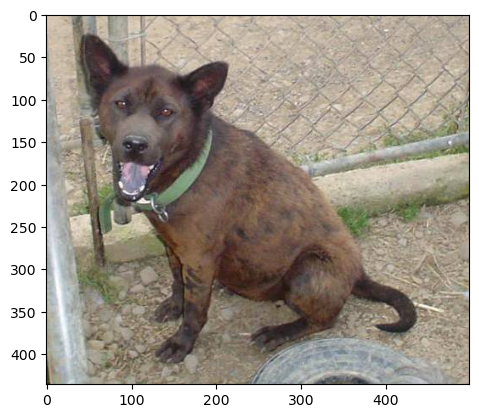

cats = 48.678701349865875%
dogs = 51.3212986501341%
The predicted image is : dogs


In [18]:
path='../Downloads/test_set/test_set/dogs/dog.4979.jpg'
img=imread(path) 
plt.imshow(img) 
plt.show() 
img_resize=resize(img,(150,150,3)) 
l=[img_resize.flatten()] 
probability=model.predict_proba(l) 
for ind,val in enumerate(Categories): 
	print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+Categories[model.predict(l)[0]])